In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Initial Checks

In [3]:
df = pd.read_csv("Dataset.csv")
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
from sklearn.preprocessing import LabelEncoder

df['Result'] = LabelEncoder().fit_transform(df['Result'])
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [6]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [7]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Feature Addition

In [9]:
df.insert(loc = 5, column = 'Pulse pressue', value = df['Systolic blood pressure'] - df['Diastolic blood pressure'])
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Pulse pressue,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,77,160.0,1.80,0.012,0
1,21,1,94,98,46,52,296.0,6.75,1.060,1
2,55,1,64,160,77,83,270.0,1.99,0.003,0
3,64,1,70,120,55,65,270.0,13.87,0.122,1
4,55,1,64,112,65,47,300.0,1.08,0.003,0


# Exploratory Data Analysis

## Univariate Analysis

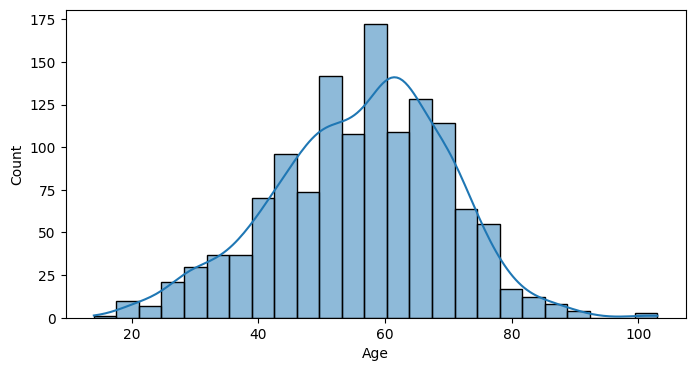

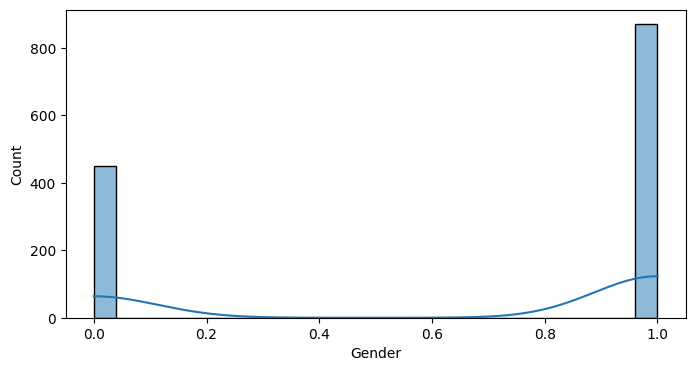

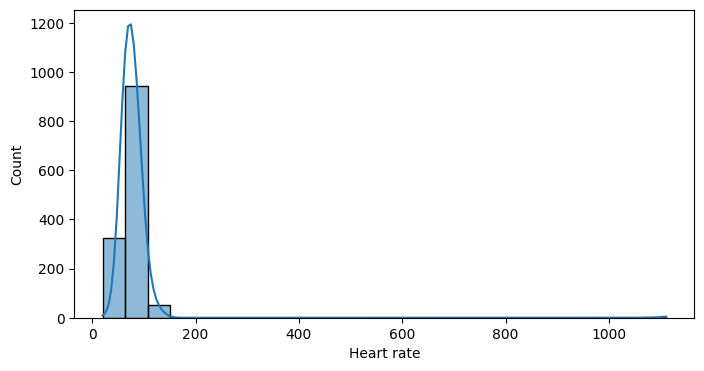

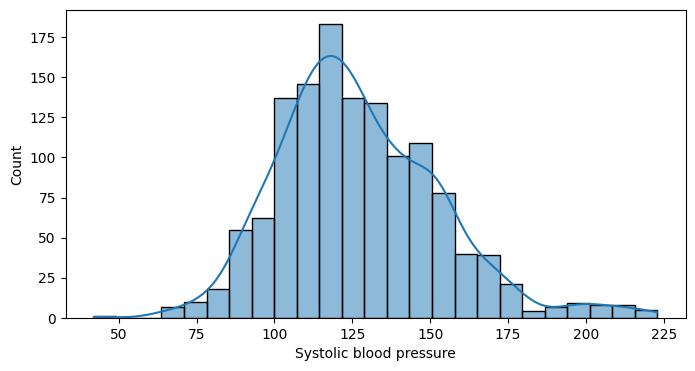

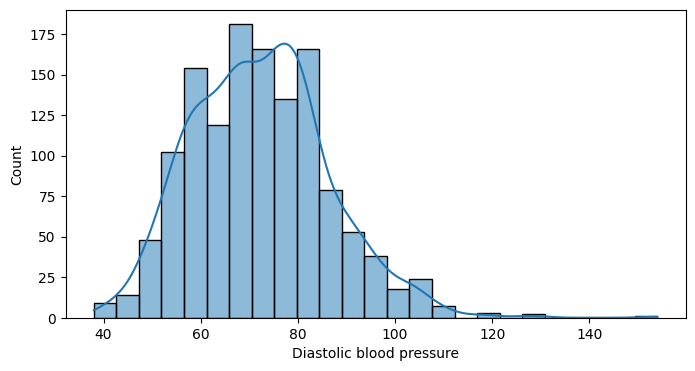

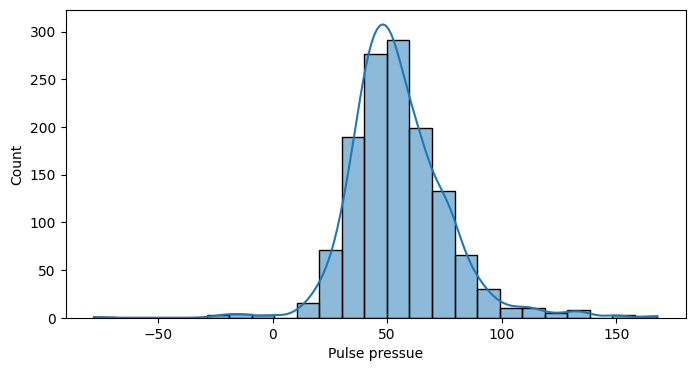

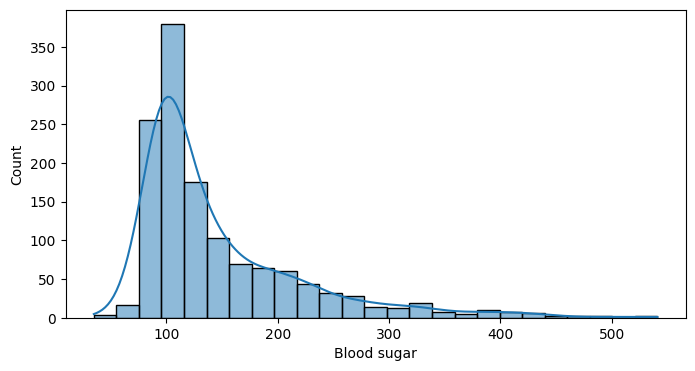

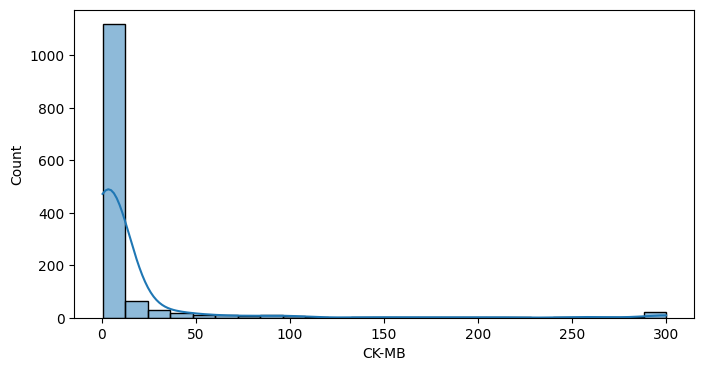

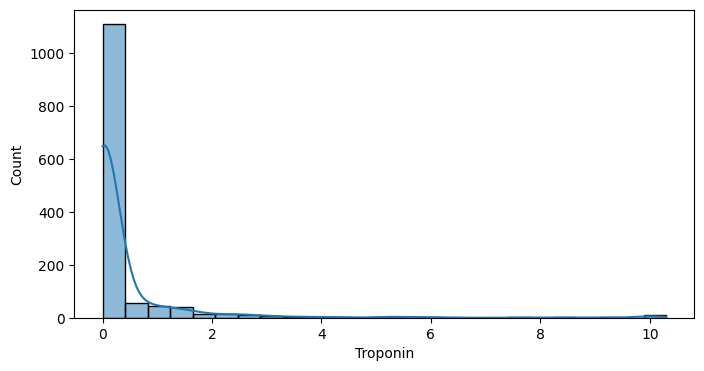

In [11]:
for col in [c for c in df.columns if c != 'Result']:
    plt.figure(figsize=(8,4))
    sns.histplot(x = df[col],
                 kde = True,
                 bins = 25)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

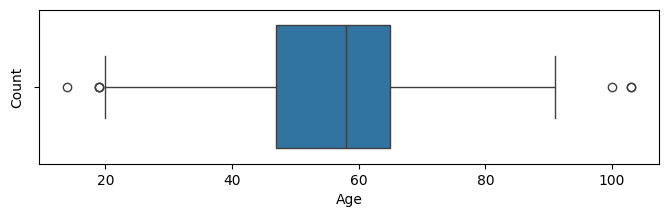

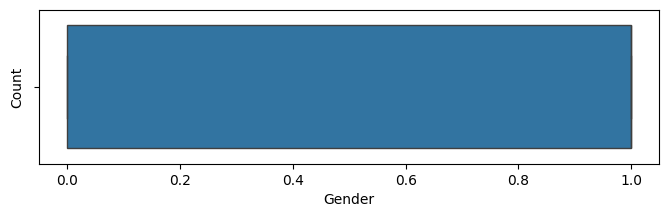

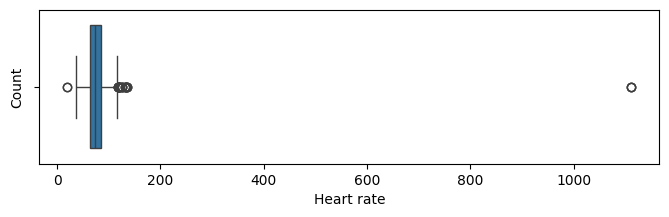

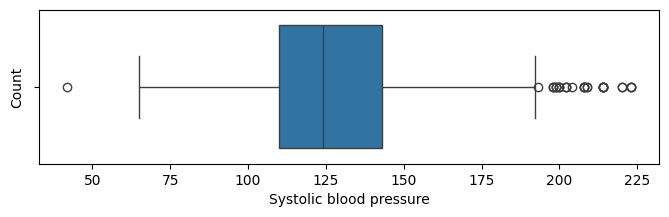

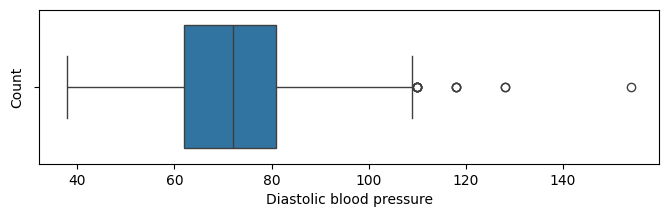

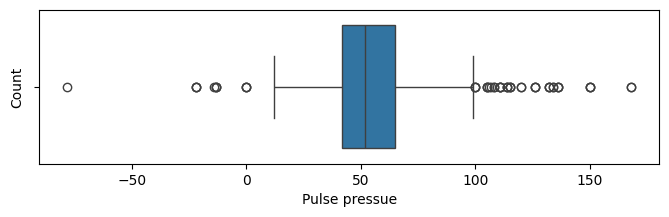

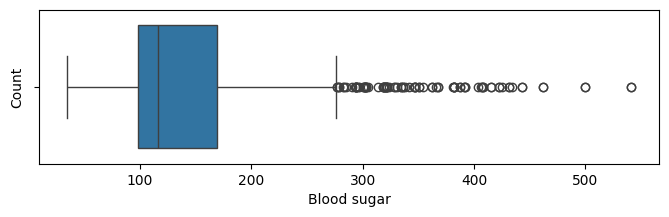

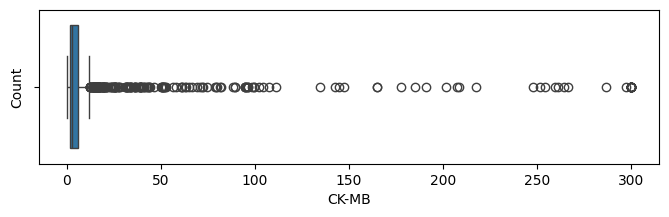

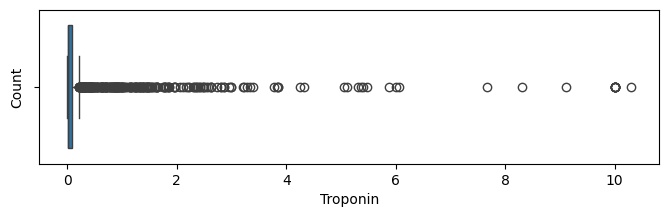

In [12]:
for col in [c for c in df.columns if c != 'Result']:
    plt.figure(figsize=(8,2))
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Correlation Analysis

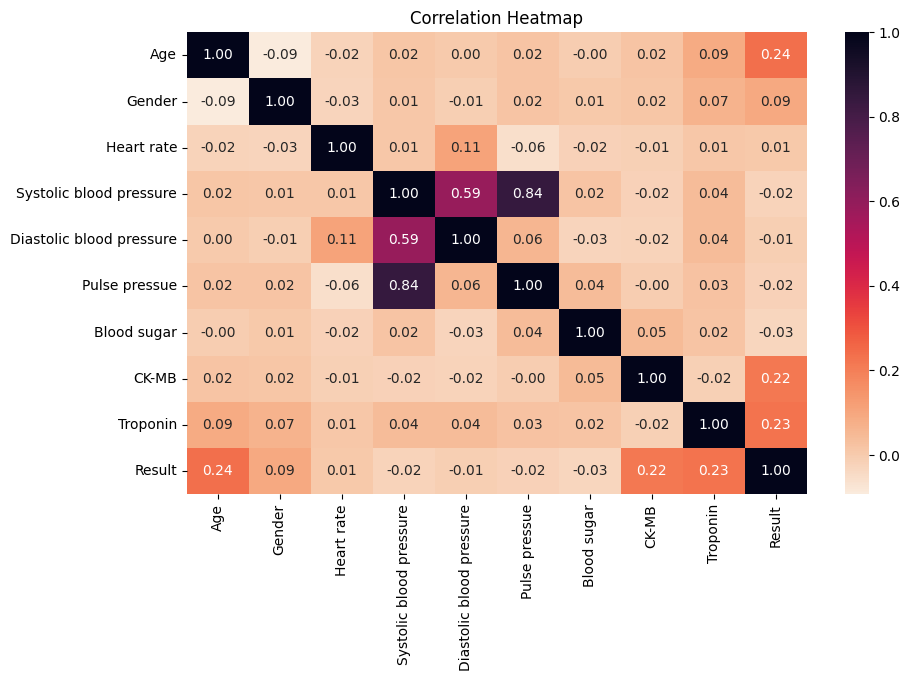

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

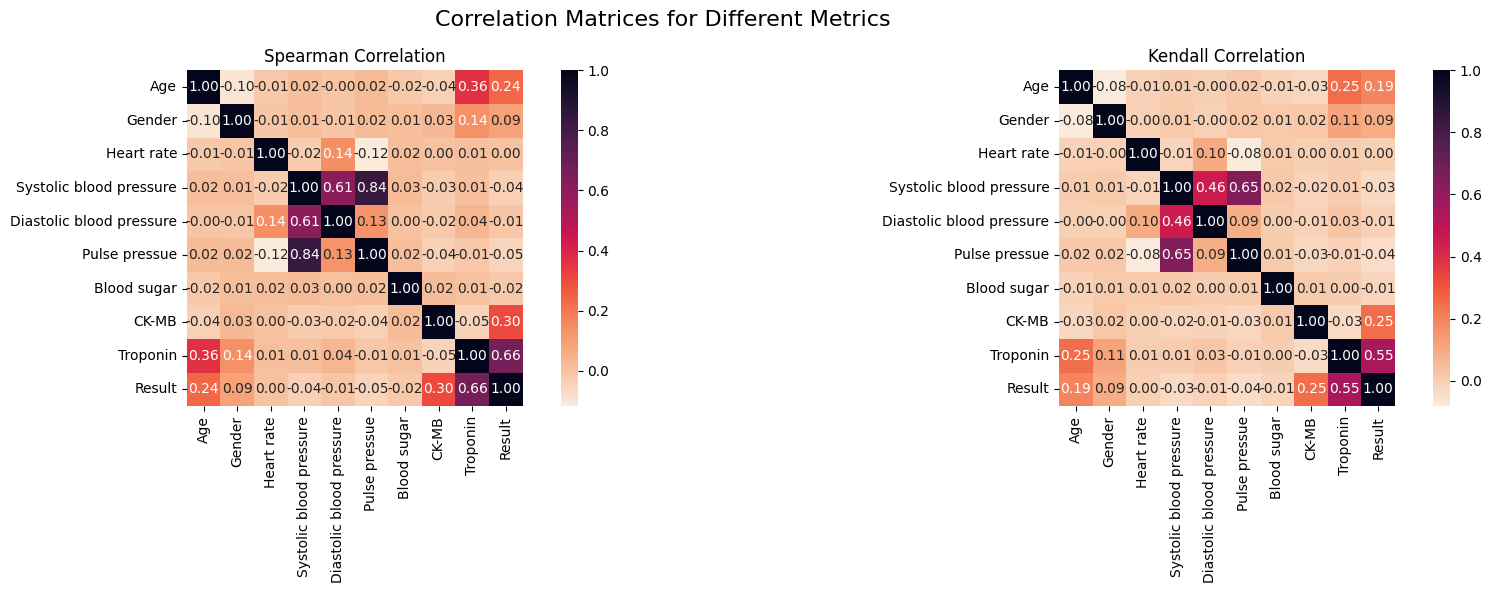

In [14]:
corr_spearman = df.corr(method='spearman')
corr_kendall = df.corr(method='kendall')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(corr_spearman, annot=True, cmap="rocket_r", fmt=".2f", cbar=True, square=True, ax=axes[0])
axes[0].set_title("Spearman Correlation")

sns.heatmap(corr_kendall, annot=True, cmap="rocket_r", fmt=".2f", cbar=True, square=True, ax=axes[1])
axes[1].set_title("Kendall Correlation")

plt.suptitle("Correlation Matrices for Different Metrics", fontsize=16)

plt.tight_layout()
plt.show()

In [15]:
corr_matrix = df.corr()
corr_matrix

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Pulse pressue,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,0.019757,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.019835,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.058310,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.844057,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,0.060290,-0.025614,-0.023403,0.043360,-0.009659
Pulse pressue,0.019757,0.019835,-0.058310,0.844057,0.060290,1.000000,0.042589,-0.004710,0.025176,-0.019264
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,0.042589,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,-0.004710,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.025176,0.021069,-0.016008,1.000000,0.229376
Result,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.019264,-0.033059,0.217720,0.229376,1.000000


In [16]:

corr_matrix_result = corr_matrix['Result'].sort_values(ascending=False)
corr_matrix_result

Result                      1.000000
Age                         0.238097
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Heart rate                  0.006920
Diastolic blood pressure   -0.009659
Pulse pressue              -0.019264
Systolic blood pressure    -0.020825
Blood sugar                -0.033059
Name: Result, dtype: float64

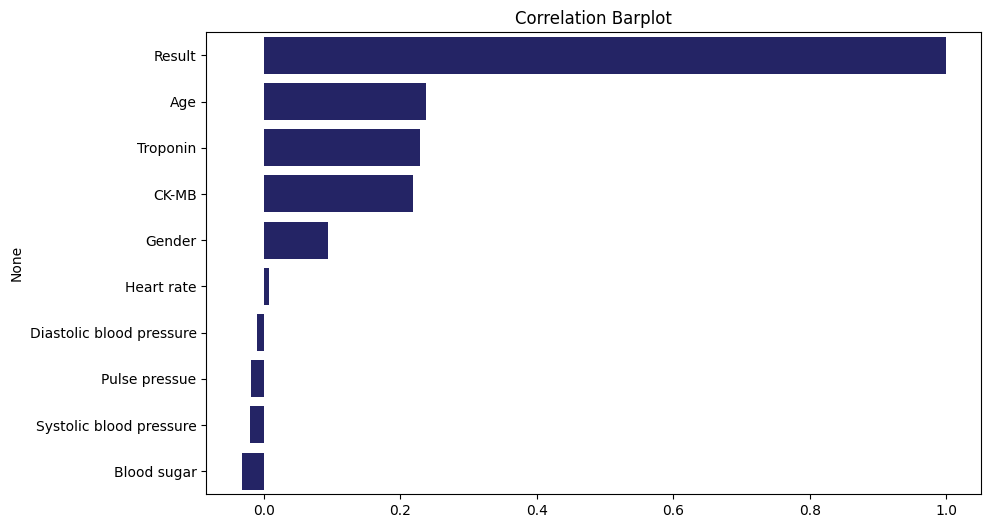

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x = corr_matrix_result.values, y = corr_matrix_result.index, color = 'midnightblue')
plt.title('Correlation Barplot')
plt.show()

## Statistical Testing

In [18]:


from scipy.stats import ttest_ind, chi2_contingency

pos = df[df['Result'] == 1]
neg = df[df['Result'] == 0]

for col in df.columns:
    stat, p = ttest_ind(pos[col], neg[col], equal_var=False)
    print(f'{col}: t = {stat:.4f}, p = {p:.8f} {"|| Significant" if p < 0.05 else "|| Not Significant"}')

Age: t = 8.7793, p = 0.00000000 || Significant
Gender: t = 3.3947, p = 0.00071330 || Significant
Heart rate: t = 0.2574, p = 0.79692609 || Not Significant
Systolic blood pressure: t = -0.7461, p = 0.45574825 || Not Significant
Diastolic blood pressure: t = -0.3479, p = 0.72799419 || Not Significant
Pulse pressue: t = -0.6932, p = 0.48831528 || Not Significant
Blood sugar: t = -1.1796, p = 0.23842222 || Not Significant
CK-MB: t = 10.2109, p = 0.00000000 || Significant
Troponin: t = 10.3254, p = 0.00000000 || Significant
Result: t = inf, p = 0.00000000 || Significant


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
for col in df.columns:
    table = pd.crosstab(df[col], df['Result'])

    chi2, p, dof, expected = chi2_contingency(table)

    print(f'Chi-square test of {col}: χ² = {chi2:.3f}, p = {p:.6f} {"|| Significant" if p < 0.05 else "|| Not Significant"}')

Chi-square test of Age: χ² = 151.974, p = 0.000000 || Significant
Chi-square test of Gender: χ² = 11.356, p = 0.000752 || Significant
Chi-square test of Heart rate: χ² = 78.978, p = 0.447746 || Not Significant
Chi-square test of Systolic blood pressure: χ² = 128.625, p = 0.181740 || Not Significant
Chi-square test of Diastolic blood pressure: χ² = 72.642, p = 0.456657 || Not Significant
Chi-square test of Pulse pressue: χ² = 105.063, p = 0.294511 || Not Significant
Chi-square test of Blood sugar: χ² = 246.762, p = 0.420745 || Not Significant
Chi-square test of CK-MB: χ² = 730.746, p = 0.196472 || Not Significant
Chi-square test of Troponin: χ² = 798.936, p = 0.000000 || Significant
Chi-square test of Result: χ² = 1314.784, p = 0.000000 || Significant


# Predictive Modeling

In [20]:
X = df.drop(columns=['Result'])
y = df['Result']

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Feature Importance

C:\Users\rohit\AppData\Local\Temp\ipykernel_25448\3242409211.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = 'Feature', data = importances_df, palette='viridis')


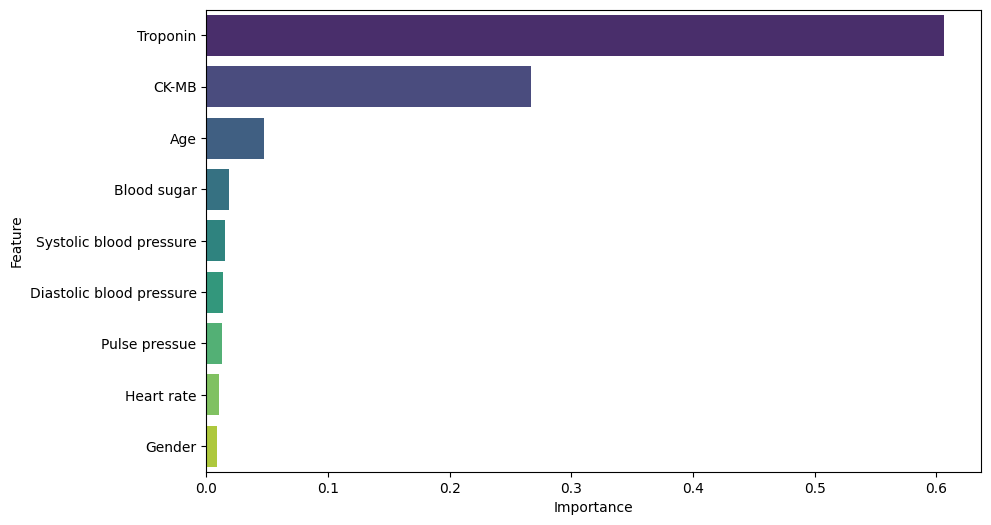

In [22]:
importances = model.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Importance', y = 'Feature', data = importances_df, palette='viridis')
plt.show()

## Evaluation

In [23]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [24]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 98.48%


In [25]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.99      0.99      0.99       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



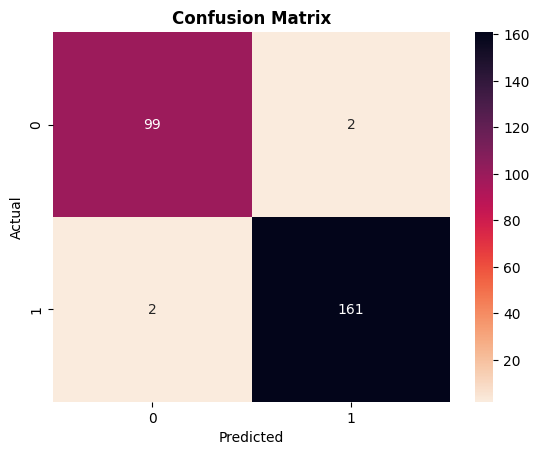

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rocket_r', fmt = 'd')
plt.title('Confusion Matrix', weight = 'bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


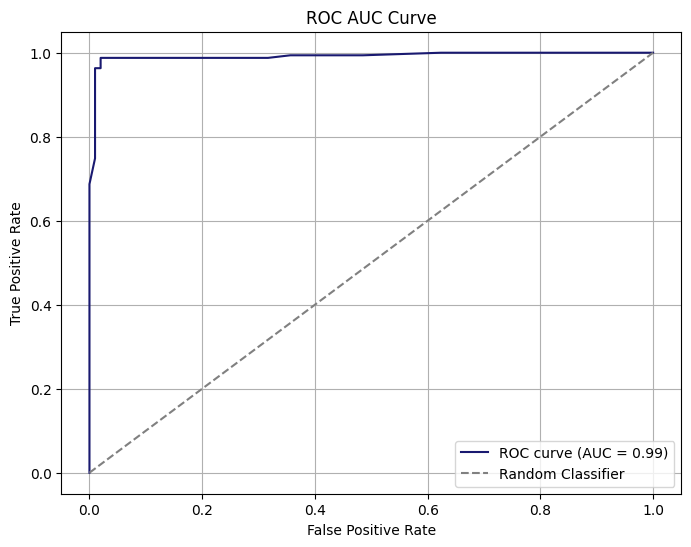

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='midnightblue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

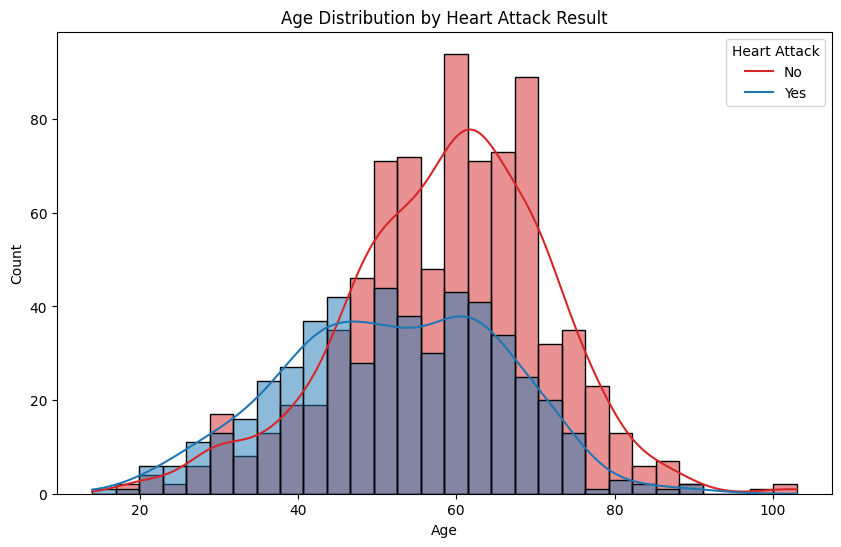

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Result', kde=True, bins=30, palette=['#1f77b4', '#d62728'])
plt.title('Age Distribution by Heart Attack Result')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_25448\1718242867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Result', y='Age', palette=['#1f77b4', '#d62728'])


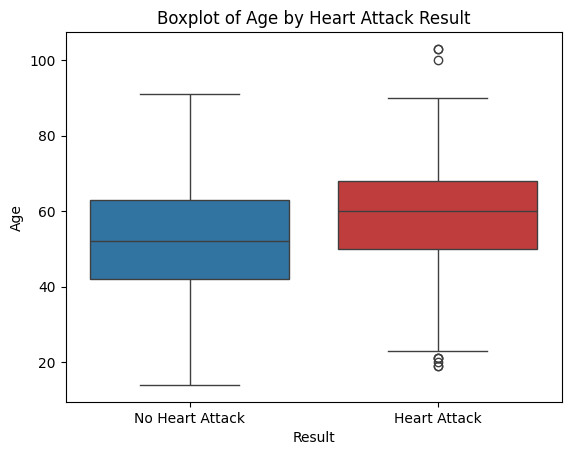

In [29]:
sns.boxplot(data=df, x='Result', y='Age', palette=['#1f77b4', '#d62728'])
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack'])
plt.title('Boxplot of Age by Heart Attack Result')
plt.ylabel('Age')
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_25448\2461897872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Result', y='Age', palette='Set2')


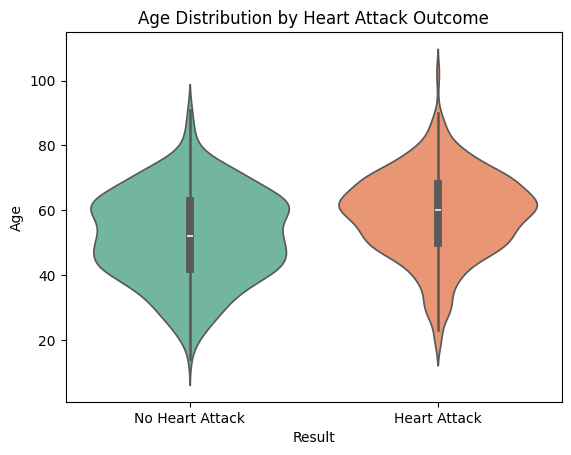

In [30]:
sns.violinplot(data=df, x='Result', y='Age', palette='Set2')
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack'])
plt.title('Age Distribution by Heart Attack Outcome')
plt.ylabel('Age')
plt.show()
